**Problem Statement**

The objective is to analyze the factors influencing employee attrition using attributes like age, department, job satisfaction, and work-life balance. Provide insights to reduce turnover and improve employee retention.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Attrition Data.csv")

In [3]:
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [4]:
df.shape

(1470, 13)

In [5]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [7]:
df.isna().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [8]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [9]:
df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

Finding ouliers

<Axes: xlabel='Age'>

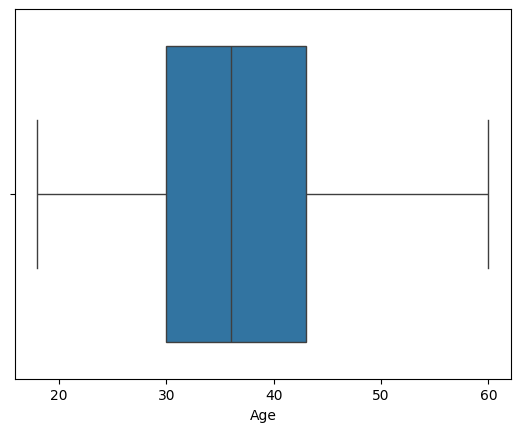

In [10]:
sns.boxplot(x="Age", data=df)

<Axes: xlabel='MonthlyIncome'>

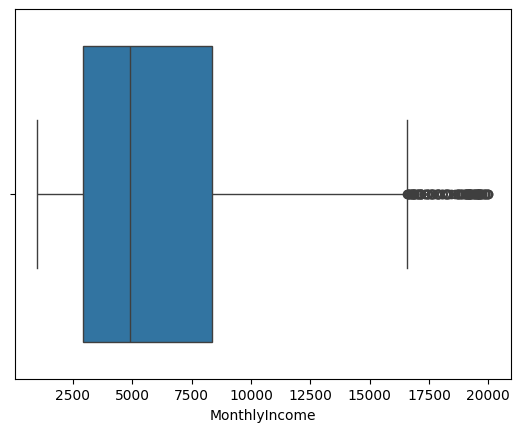

In [11]:
sns.boxplot(x="MonthlyIncome", data=df)	

<Axes: xlabel='EducationField'>

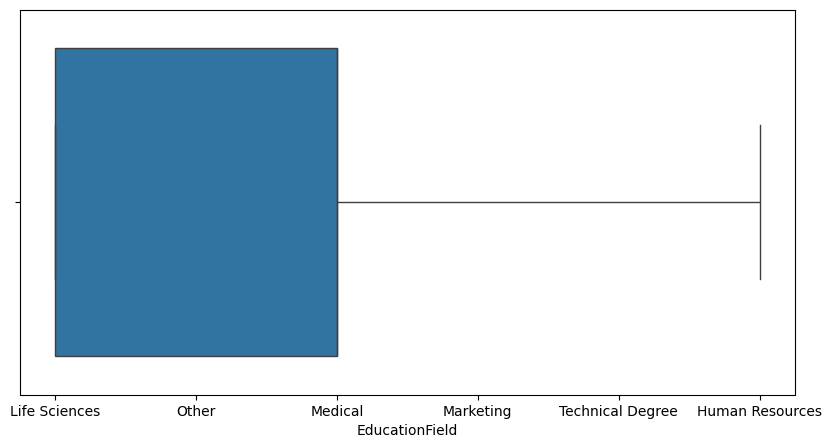

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="EducationField", data= df)

In [13]:
df = df[df["MonthlyIncome"] < df["MonthlyIncome"].quantile(0.99)]

In [14]:
df.shape

(1455, 13)

Performing the EDA


**univariate anlysis**

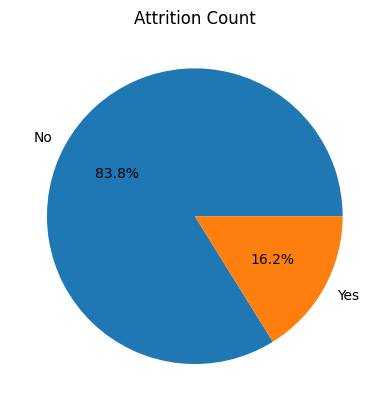

In [15]:
attrition_counts = df["Attrition"].value_counts()

plt.pie(attrition_counts, labels=["No", "Yes"], autopct="%1.1f%%")

plt.title("Attrition Count")

plt.show()

**Observation**

From this pieplot we can say that Attrition rate is very low in the company

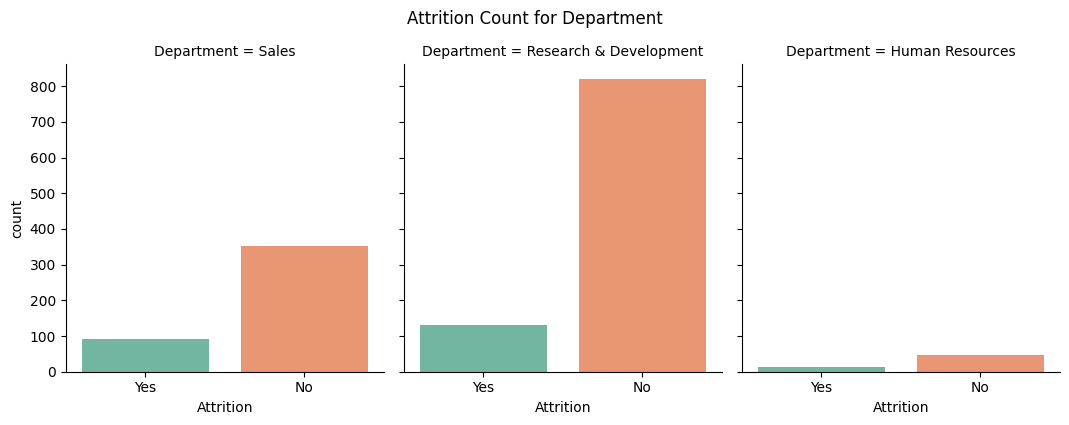

In [16]:
sns.catplot(x="Attrition", col="Department", data=df, kind="count", palette="Set2",height=4, aspect=0.9)
plt.suptitle("Attrition Count for Department", y=1.05)  
plt.show()

**Observation**

From this graph, we can say that the attrition rate is very low, and most of the employees leaving the job are from the Research and Development department.

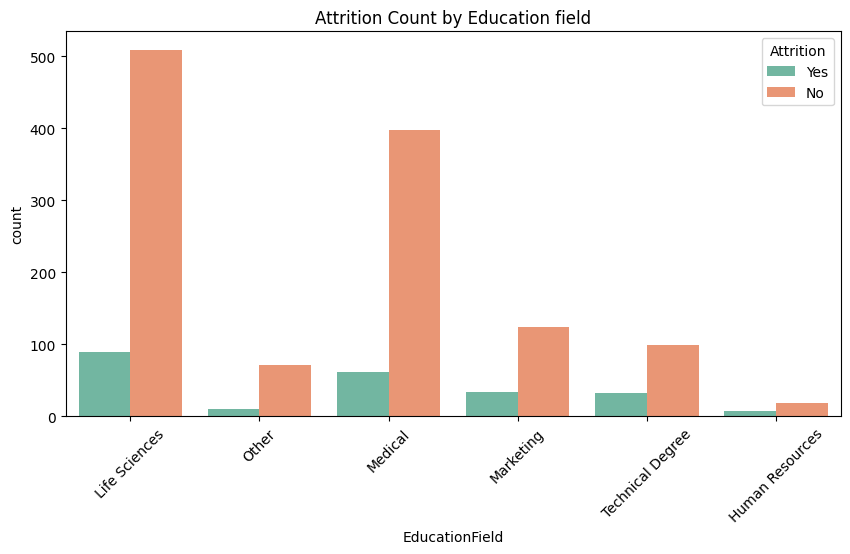

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x="EducationField",hue="Attrition", data=df, palette="Set2")
plt.title("Attrition Count by Education field")
plt.xticks(rotation=45)
plt.show()

**Observation**

From this graph, we can say that most of the employees leaving the job are from the Life Science education field.

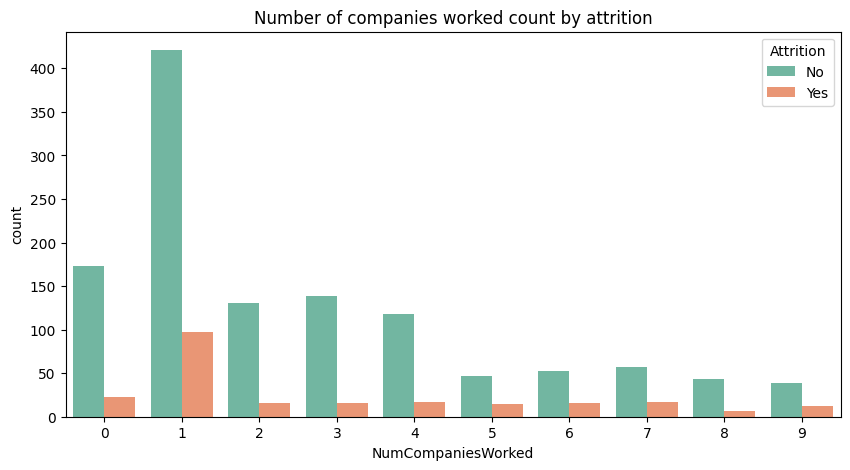

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="NumCompaniesWorked", hue="Attrition", data=df, palette="Set2")
plt.title("Number of companies worked count by attrition")
plt.show()


**Observation**

From this graph, we can say that most of the employees leaving the job have experience with only one company.

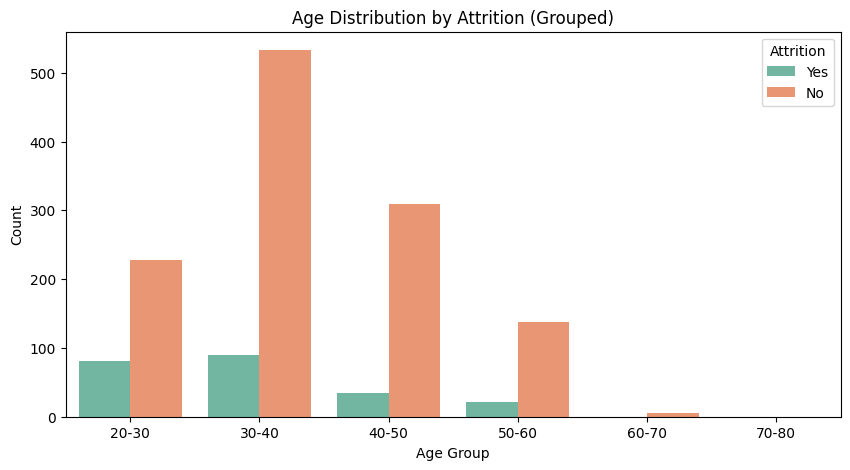

In [19]:
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']


df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_Group', hue='Attrition', data=df, palette="Set2")
plt.title('Age Distribution by Attrition (Grouped)')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Observation**

From this graph, we can analyze that the majority of employees leaving the job belong to the 30-40 age group.

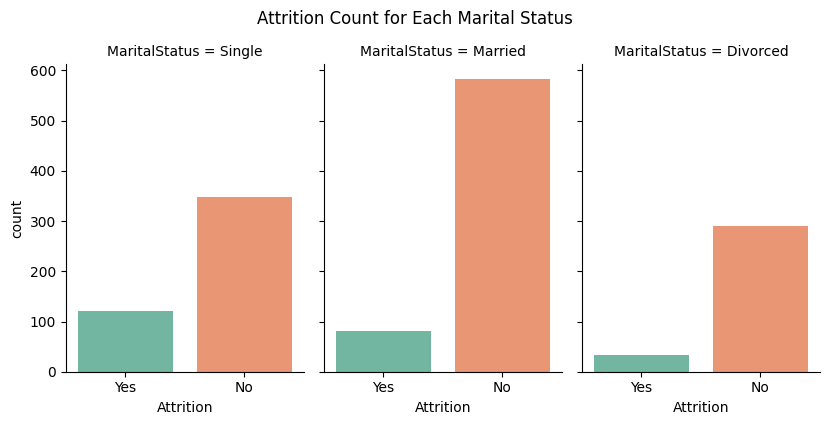

In [20]:
sns.catplot(x="Attrition", col="MaritalStatus", data=df, kind="count", palette="Set2",height=4, aspect=0.7)

plt.suptitle("Attrition Count for Each Marital Status", y=1.05)

plt.show()

**Observation**

From the graph, we can observe that most of the employees leaving the job are unmarried, which suggests a possible connection between marital status and attrition rates.

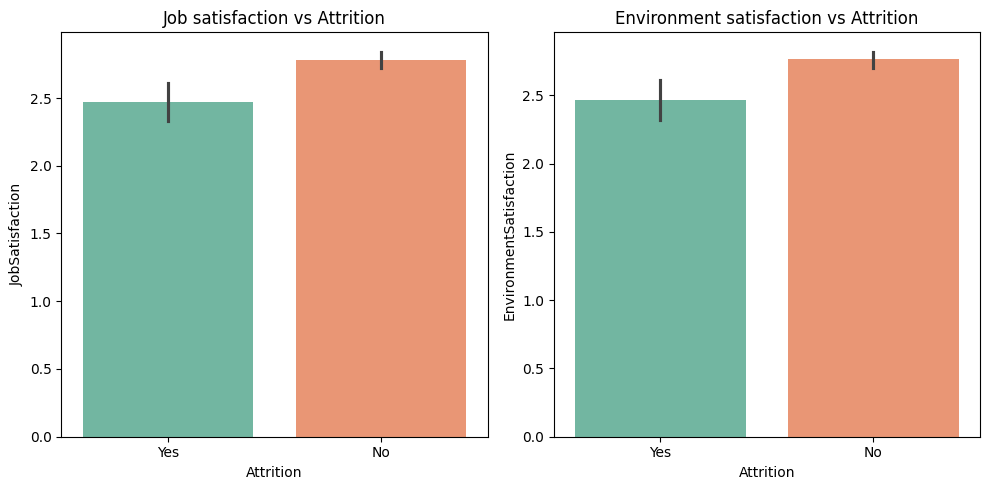

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x="Attrition", y="JobSatisfaction", data=df, palette="Set2")
plt.title("Job satisfaction vs Attrition")

plt.subplot(1,2,2)
sns.barplot(x="Attrition", y="EnvironmentSatisfaction", data=df, palette="Set2")
plt.title("Environment satisfaction vs Attrition")
plt.tight_layout()
plt.show()

**Observation**

From this graph, we can observe that employees are leaving the job due to low satisfaction levels with both the job and the work environment.

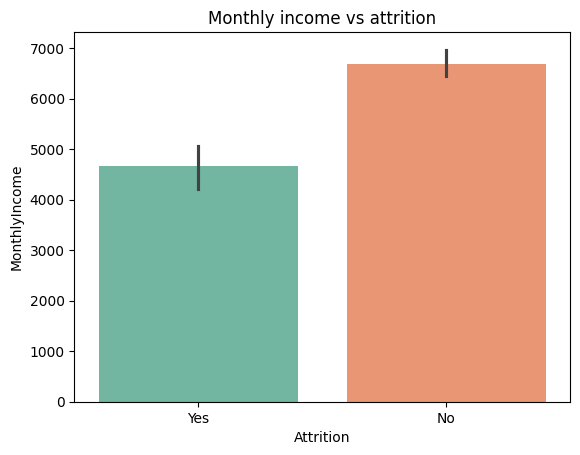

In [22]:
sns.barplot(x="Attrition", y="MonthlyIncome", data=df, palette="Set2")
plt.title("Monthly income vs attrition")
plt.show()

**Observation**

From this graph, we can observe that employees are leaving the job because they are receiving very low salary.


**Conclusion**

Employee attrition is influenced by low salary, limited experience, and specific departments such as Research and Development and Life Sciences. Most employees leaving the job are in the 30-40 age group with only one year of experience. Addressing these factors can help to reduce attrition.